In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
df_energia_2021 = pd.read_csv("../input/energia_202109-202112.csv", encoding='latin-1')
df_energia_2022 = pd.read_csv('../input/energia_202201-202212.csv',encoding='latin-1')
df_energia_2023 = pd.read_csv('../input/energia_202301-202304.csv', encoding='latin-1')

In [5]:
merged_dataset = pd.concat([df_energia_2021, df_energia_2022, df_energia_2023])

In [6]:
print(merged_dataset.isnull().sum())

Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)      10033
dtype: int64


In [8]:
merged_dataset.rename(columns={"Hora": "hora", "Normal (kWh)": "normal", "Horário Económico (kWh)": "horario", "Autoconsumo (kWh)": "autoconsumo"}, inplace=True)

<Figure size 1200x600 with 0 Axes>

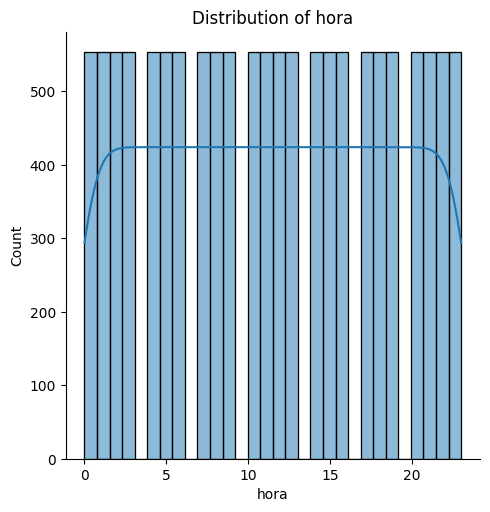

<Figure size 1200x600 with 0 Axes>

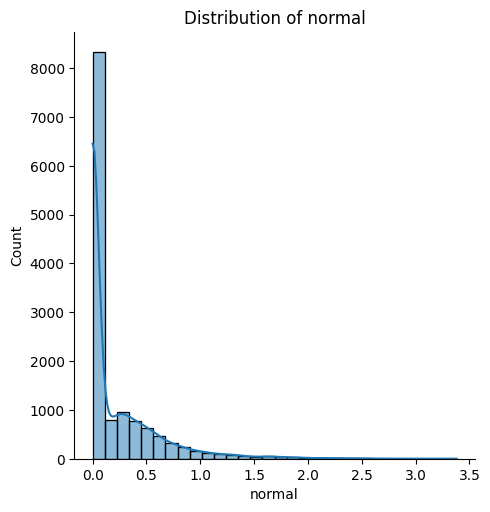

<Figure size 1200x600 with 0 Axes>

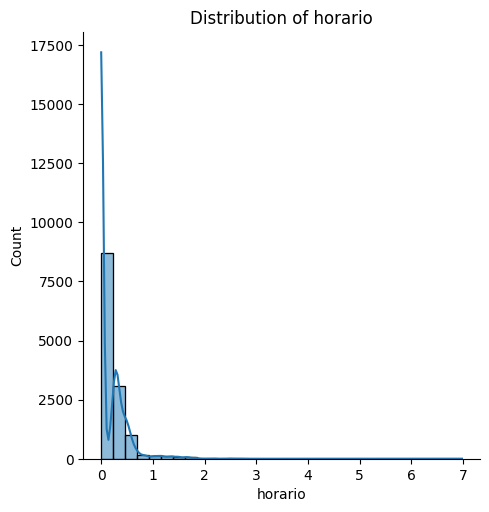

<Figure size 1200x600 with 0 Axes>

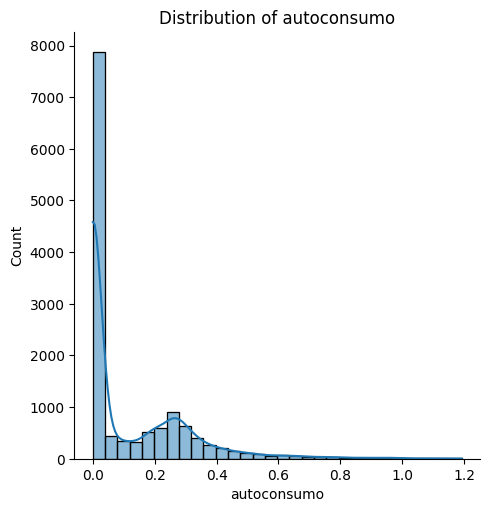

In [9]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    plt.figure(figsize=(12, 6))
    sns.displot(merged_dataset[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [13]:
cols = ['hora', 'normal', 'horario', 'autoconsumo']

for col in cols:
    print(f"{col} : {merged_dataset[col].skew()}")


hora : 0.0
normal : 2.6030425469302245
horario : 3.582323936174385
autoconsumo : 1.889246604545493


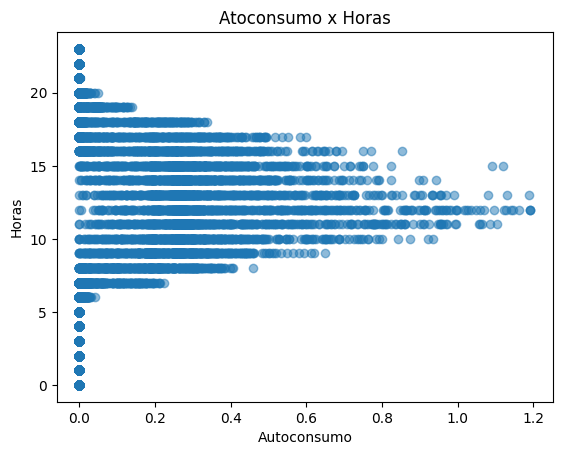

In [15]:
plt.scatter(merged_dataset['autoconsumo'], merged_dataset['hora'], alpha=0.5)

plt.xlabel('Autoconsumo')
plt.ylabel('Horas')
plt.title('Atoconsumo x Horas')

plt.show()

In [29]:
nbins = 6

hours_avg_autoconsume_map = merged_dataset.groupby('hora')['autoconsumo'].mean()

bins = pd.cut(merged_dataset['hora'], bins=nbins, labels=False, include_lowest=True)

merged_dataset['hora_Bin'] = bins

print(merged_dataset[['hora', 'autoconsumo', 'hora_Bin']])

for i in range(nbins):
    values_in_bin = merged_dataset.loc[merged_dataset['hora_Bin'] == i, 'hora']
    print(f'Bin {i + 1} - {values_in_bin.values}')


      hora  autoconsumo  hora_Bin
0        0        0.000         0
1        1        0.000         0
2        2        0.000         0
3        3        0.000         0
4        4        0.000         1
...    ...          ...       ...
2251    19        0.012         4
2252    20        0.000         5
2253    21        0.000         5
2254    22        0.000         5
2255    23        0.000         5

[13272 rows x 3 columns]
Bin 1 - [0 1 2 ... 1 2 3]
Bin 2 - [4 5 6 ... 5 6 7]
Bin 3 - [ 8  9 10 ...  9 10 11]
Bin 4 - [12 13 14 ... 13 14 15]
Bin 5 - [16 17 18 ... 17 18 19]
Bin 6 - [20 21 22 ... 21 22 23]


Valores dos bins: Bin 1 -> 0 a 3; Bin 2 -> 4 a 7; Bin 3 -> 8 a 11; Bin 4 -> 12 a 15; Bin 5 -> 16 a 19; Bin 6 -> 20 a 23